
### Objective:

The objective of this assignment is to introduce to various clustering algorithms, including K-Means, hierarchical, and DBSCAN, and provide hands-on experience in applying these techniques to a real-world dataset.


### Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
from sklearn.metrics import accuracy_score,confusion_matrix,silhouette_score
from kneed import KneeLocator
import scipy.cluster.hierarchy as sch

import warnings
warnings.filterwarnings('ignore')


### Import Dataset

In [2]:
airlines_data = pd.read_excel('EastWestAirlines.xlsx',sheet_name = 1)

In [3]:
airlines_data.shape

(3999, 12)

In [4]:
airlines_data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [5]:
airlines_data.isna().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [6]:
## rename column name
airlines_data.rename(columns={'Award?':'Award'},inplace=True)

In [7]:
## drop unnessary columns which does not contribute much
airlines_data.drop([('ID#')],axis=1,inplace=True)

### Data Preprocessing

In [8]:
##scale the feature using standard scaler
scaler = StandardScaler()
scaled_airline = scaler.fit_transform(airlines_data)

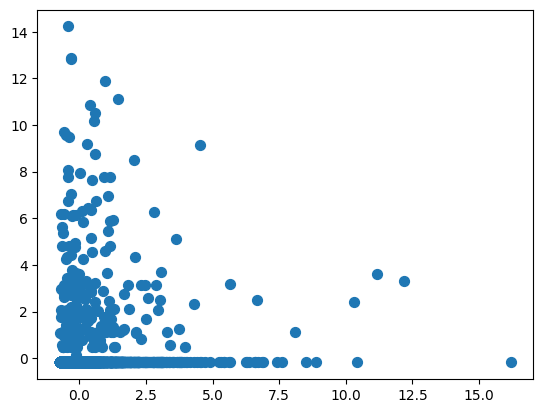

In [9]:
plt.scatter(scaled_airline[:,0] ,scaled_airline[:,1] ,s=50,cmap='viridis' )

### Model Building

### K-means Clustering

In [10]:
##define k-means object
k_cluster = KMeans(n_clusters=4)
k_cluster.fit(scaled_airline)

  File "s:\DataScience\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\jayes\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\jayes\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\jayes\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


KMeans(n_clusters=4)

##### Model Evaluation

In [11]:
y_predict = k_cluster.predict(scaled_airline)

In [12]:
##let's find the inertia
k_cluster.inertia_

29191.735678527122

In [13]:
### Calculate WCSS for difeerent k-values (WCSS - is the sum of squared distances from each
### point to its assigned cluster center)
wcss = []

for i in range(1,11):
    k_cluster = KMeans(n_clusters=i)
    k_cluster.fit(scaled_airline)
    inertia = k_cluster.inertia_
    wcss.append((inertia))

In [14]:
wcss

[43988.999999999985,
 35409.61927448697,
 30906.161177016416,
 28909.46772493804,
 24885.833053896455,
 24382.328003603237,
 19412.276540746054,
 17369.204300737,
 16068.989815974055,
 15057.77627754756]

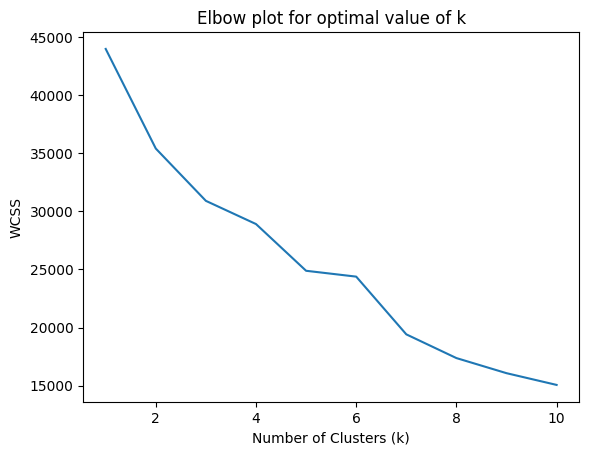

In [15]:
#plot the elbow graph to check the the optimal value of k

plt.plot(range(1,11),wcss)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.title("Elbow plot for optimal value of k")
plt.show()

In [16]:
#find the optimal k-value using knee lacator
kl = KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')

In [17]:
print(kl.elbow)

7


In [18]:
## build a model for using optimal k value 
k_cluster = KMeans(n_clusters=8,random_state=0)
k_cluster.fit_predict(scaled_airline)

array([3, 3, 3, ..., 0, 6, 6])

In [19]:
cluster = k_cluster.predict(scaled_airline)

In [20]:
## create a cluster column in original dataset
airlines_data['Clusters'] = cluster

In [21]:
airlines_data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Clusters
0,28143,0,1,1,1,174,1,0,0,7000,0,3
1,19244,0,1,1,1,215,2,0,0,6968,0,3
2,41354,0,1,1,1,4123,4,0,0,7034,0,3
3,14776,0,1,1,1,500,1,0,0,6952,0,3
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1


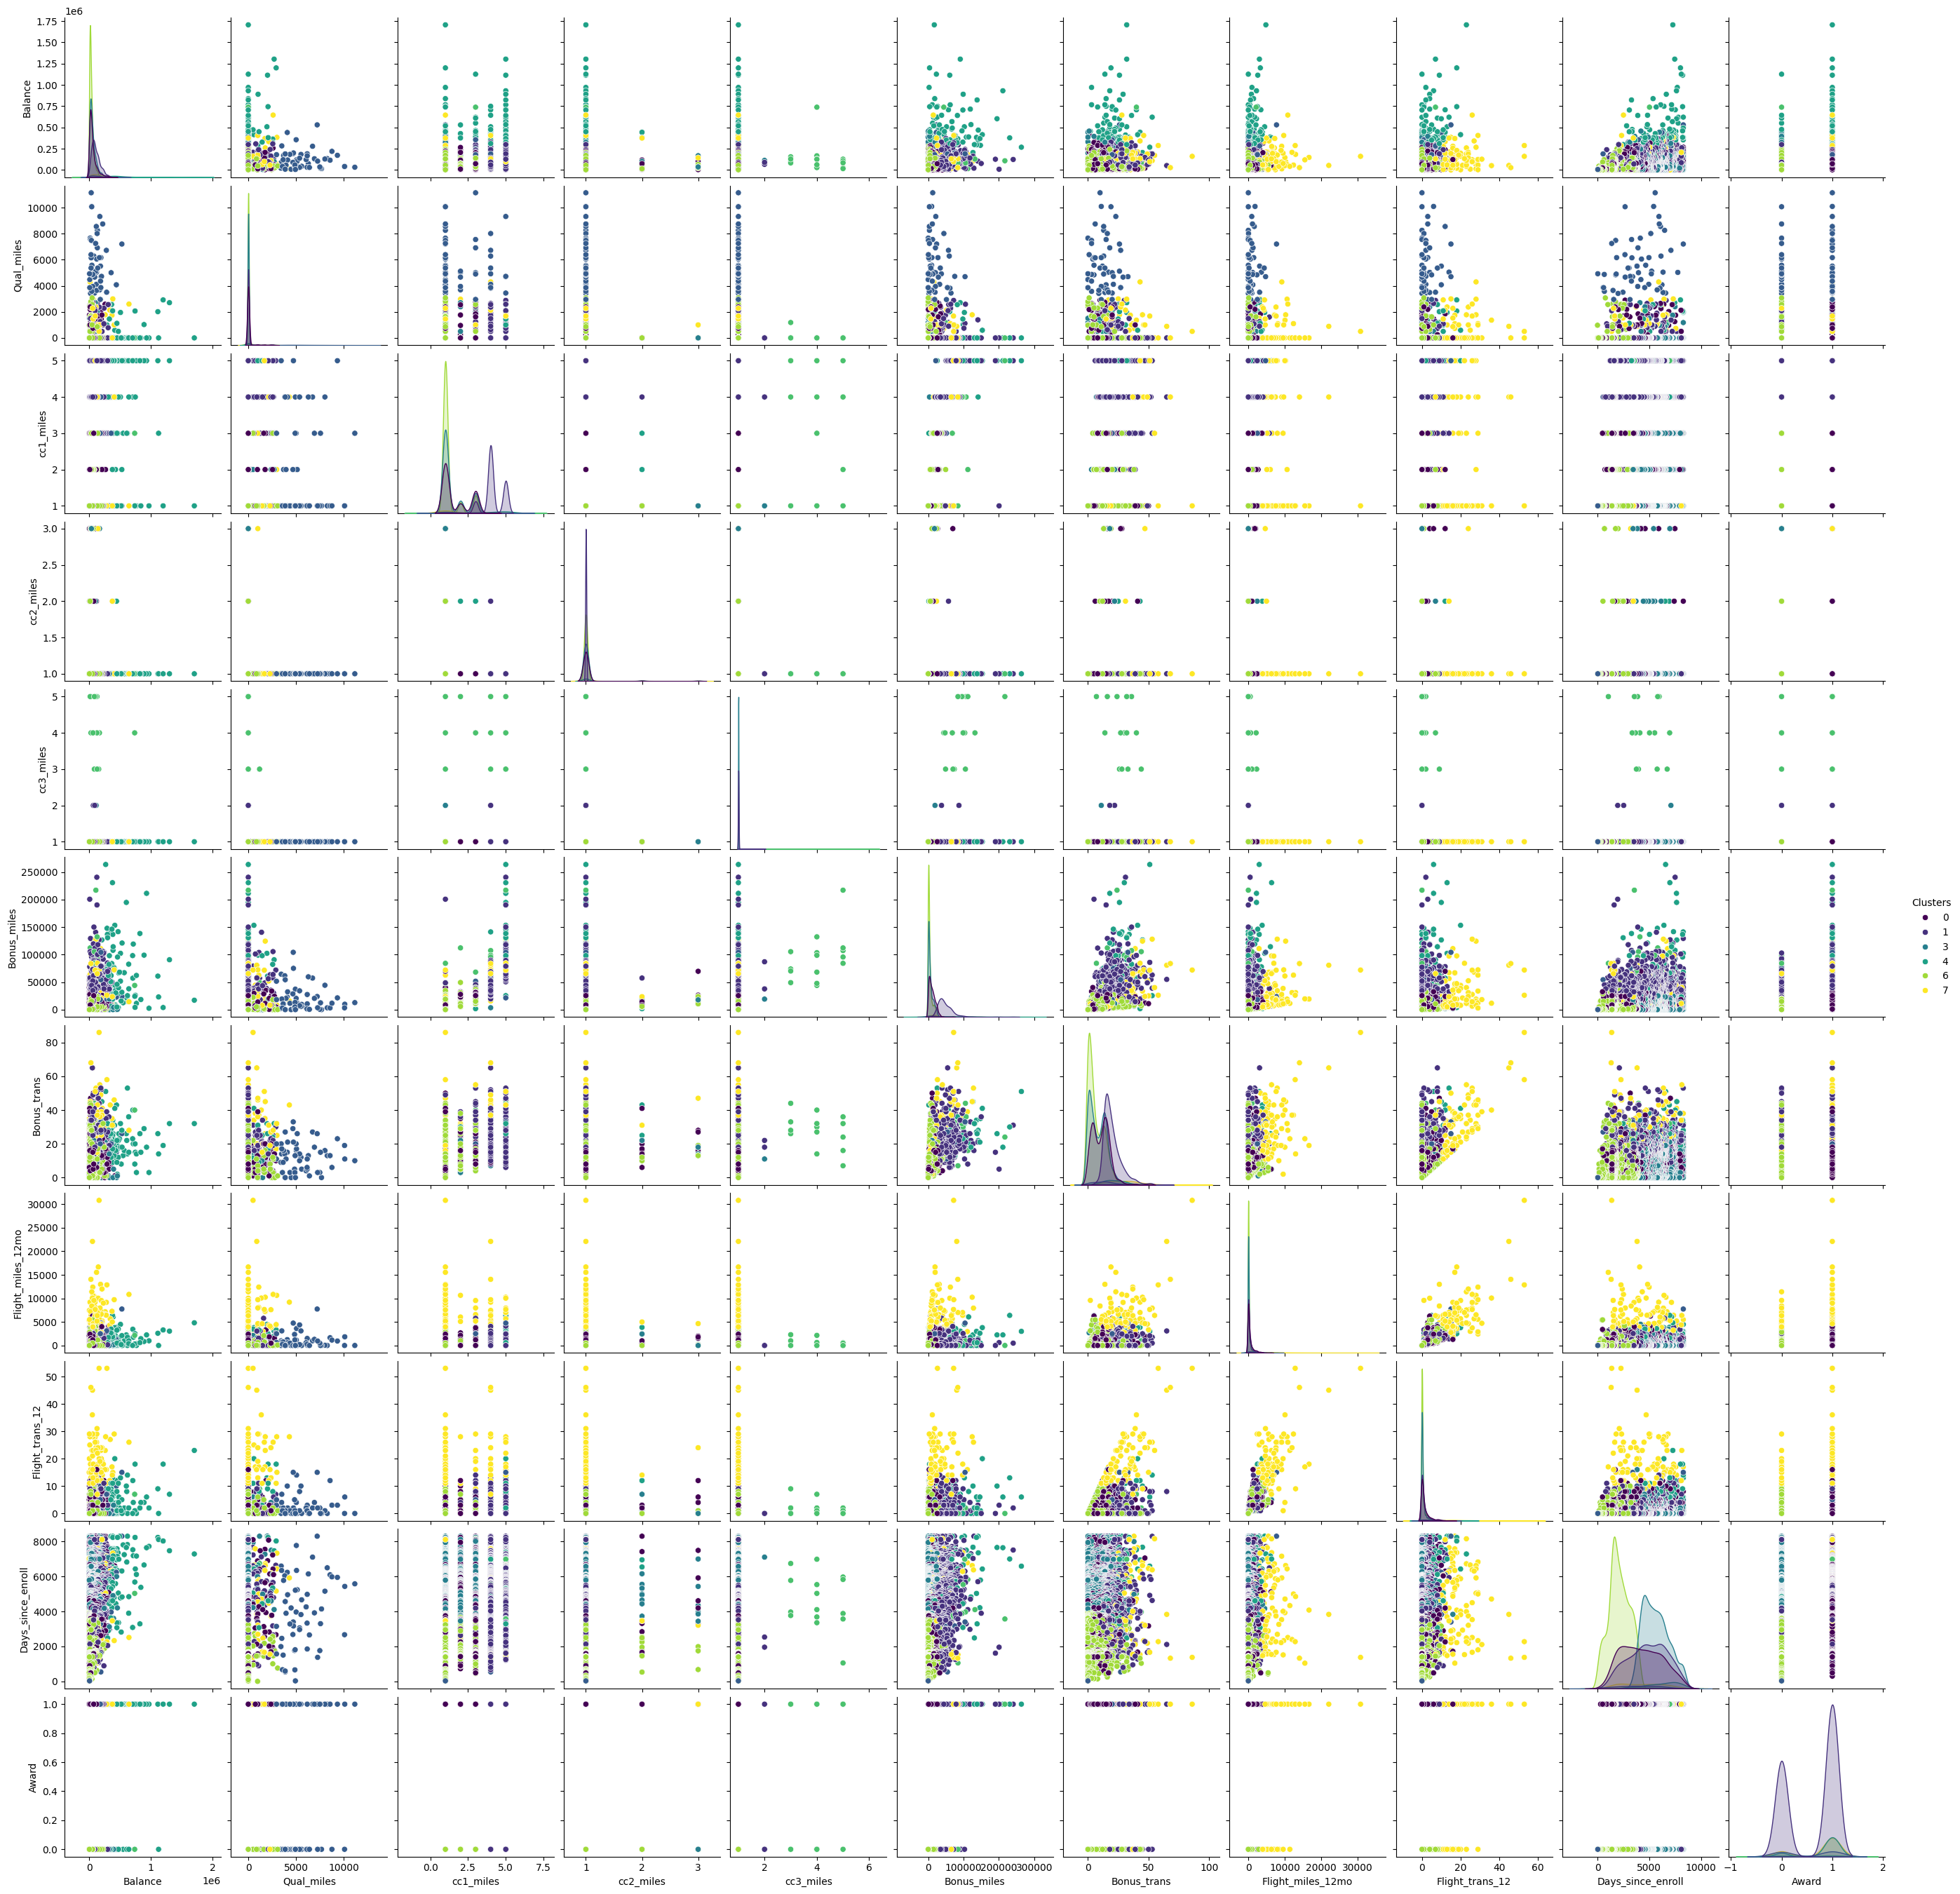

In [22]:
### Visualize the clusters
sns.pairplot(airlines_data,hue = 'Clusters',palette='viridis')

In [23]:
airlines_data.groupby('Clusters').mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
Clusters,,,,,,,,,,,
0,55382.026087,93.757764,1.663354,1.022360,1.000000,10483.747826,10.577640,425.566460,1.316770,4253.236025,1.000000
1,107305.057716,60.666248,4.169385,1.001255,1.002509,47442.307403,19.983689,377.489335,1.129235,4849.242158,0.613551
2,116472.400000,5636.345455,2.072727,1.000000,1.000000,19804.290909,12.545455,963.036364,2.890909,3950.636364,0.527273
3,58097.190965,32.770021,1.457906,1.021561,1.001027,5995.530801,8.314168,175.766940,0.527721,5640.393224,0.000000
4,529351.000000,288.764706,3.670588,1.023529,1.000000,66178.529412,22.117647,1443.564706,4.964706,6209.952941,0.847059
5,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333
6,34927.350171,32.369863,1.256849,1.011130,1.000000,4515.042808,6.732877,143.243151,0.435788,2090.369863,0.000000
7,133735.000000,470.360000,2.080000,1.030000,1.000000,30747.580000,30.010000,6745.480000,19.050000,4317.840000,0.780000


In [24]:
#find the optimal k-value using Silhouette Score

silhouette_coeff = []
for i in range(2,11):
    k_cluster = KMeans(n_clusters=i,random_state=0)
    k_cluster.fit(scaled_airline)
    score = silhouette_score(scaled_airline,k_cluster.labels_)
    silhouette_coeff.append(score)

In [25]:
silhouette_coeff

[0.32542136327826215,
 0.25804082820132074,
 0.25817859048712255,
 0.26898118579042996,
 0.2788033904667631,
 0.2836461929303771,
 0.23361515620582377,
 0.2479221353999542,
 0.2616279289233042]

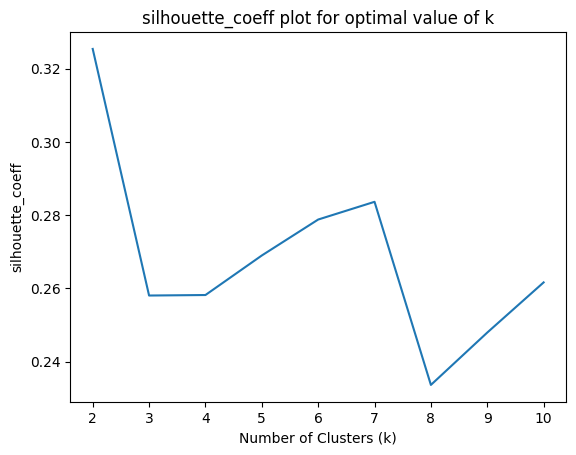

In [26]:
#plot the silhouette coefficient to check the the optimal value of k

plt.plot(range(2,11),silhouette_coeff)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("silhouette_coeff")
plt.title("silhouette_coeff plot for optimal value of k")
plt.show()

From the above grapgh we can say that we shuld use 8 as optimal k-value

### Hierarchical Clustering 

In [27]:
hc = AgglomerativeClustering(n_clusters=3, linkage='single')

In [28]:
y_pred = hc.fit_predict(scaled_airline)

<Figure size 3000x1000 with 0 Axes>

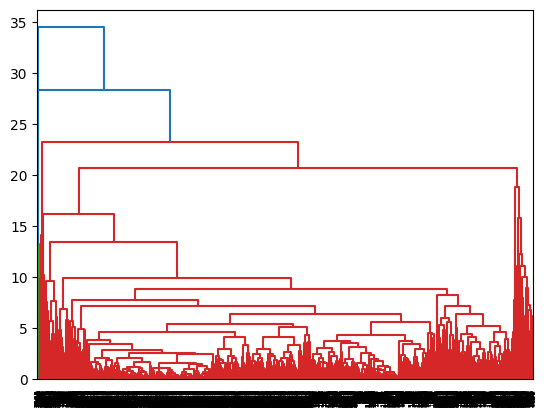

In [29]:
## create dendrogram
dendrogram = sch.dendrogram(sch.linkage(scaled_airline,method='complete'))
plt.Figure(figsize=(30,10))

<Figure size 5000x1000 with 0 Axes>

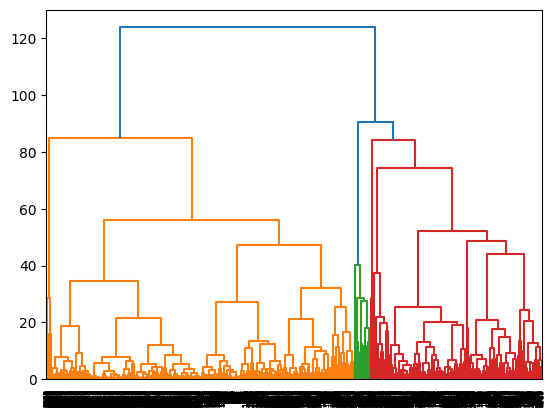

In [30]:
dendrogram = sch.dendrogram(sch.linkage(scaled_airline,method='ward'))
plt.Figure(figsize=(50,10))

In [31]:
#find the optimal k-value using Silhouette Score

silhouette_coeff = []
for i in range(2,11):
    hc = AgglomerativeClustering(n_clusters=i, linkage='ward')
    y_pred = hc.fit_predict(scaled_airline)
    score = silhouette_score(scaled_airline,hc.labels_)
    silhouette_coeff.append(score)

In [32]:
silhouette_coeff

[0.28926595242577247,
 0.2940432062008608,
 0.30814152852022786,
 0.3098805307874414,
 0.3192511970153055,
 0.18965334676868836,
 0.1890586470843928,
 0.1951894366329298,
 0.20121590768292186]

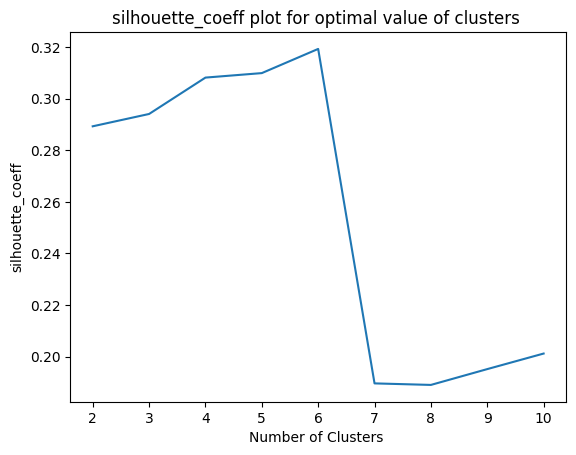

In [33]:
#plot the silhouette coefficient to check the the optimal value of clusters

plt.plot(range(2,11),silhouette_coeff)
plt.xlabel("Number of Clusters ")
plt.ylabel("silhouette_coeff")
plt.title("silhouette_coeff plot for optimal value of clusters ")
plt.show()

### DBSCAN

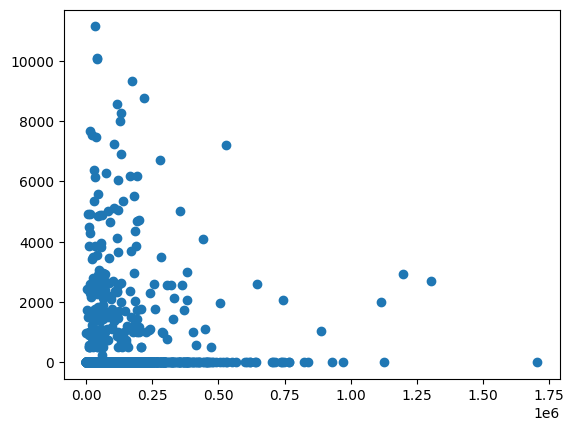

In [34]:
plt.scatter(airlines_data.iloc[:,0],airlines_data.iloc[:,1],cmap=plt.cm.Accent)

In [41]:
dbscan = DBSCAN(eps=0.3)
dbscan_pred = dbscan.fit_predict(scaled_airline)

In [42]:
dbscan_pred

array([ 0,  0,  0, ..., -1,  0,  0], dtype=int64)

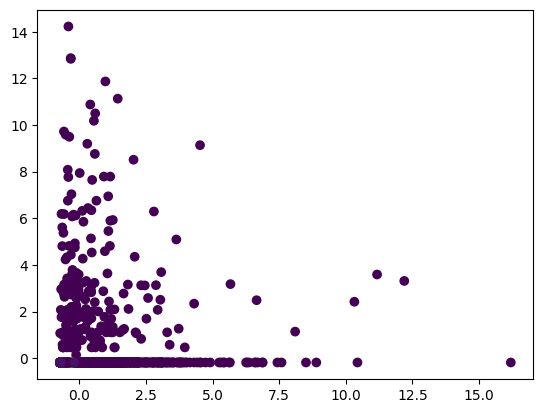

In [43]:
plt.scatter(scaled_airline[:,0],scaled_airline[:,1],c = dbscan_pred)